In [1]:
import pandas as pd
from skimage.transform import resize
from skimage.io import imread
import os
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


In [43]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
data_dir='/content/drive/MyDrive/DATASET/TRAIN'

In [3]:
os.listdir(data_dir)

['O', 'R']

In [4]:
X_train=[]
y_train=[]
catagories=['O', 'R']

In [5]:

for catagory in catagories:
    path = os.path.join(data_dir, catagory)
    images = os.listdir(path)[:2000]
    for img in images:
        img_path = os.path.join(path, img)
        image = imread(img_path)
        imaged = resize(image, (150, 150, 1))
        X_train.append(imaged)
        y_train.append(catagories.index(catagory))




In [6]:
data_dir='/content/drive/MyDrive/DATASET/TEST'

In [7]:
X_test=[]
y_test=[]
catagories=['O', 'R']

In [8]:
for catagory in catagories:
    path = os.path.join(data_dir, catagory)
    images = os.listdir(path)[:2000]
    for img in images:
        img_path = os.path.join(path, img)
        image = imread(img_path)
        imaged = resize(image, (150, 150, 1))
        X_test.append(imaged)
        y_test.append(catagories.index(catagory))



In [9]:
import numpy as np
X_train=np.array(X_train)
y_train=np.array(y_train)
X_test=np.array(X_test)
y_test=np.array(y_test)

In [10]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((4000, 150, 150, 1), (4000,), (2513, 150, 150, 1), (2513,))

In [44]:
model = Sequential()


model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(100, activation='relu'))


model.add(Dense(5, activation='softmax'))


In [12]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [13]:
model.fit(X_train,y_train,epochs=20,batch_size=70)

Epoch 1/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 148s 3s/step - accuracy: 0.5035 - loss: 1.9051
Epoch 2/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 200s 2s/step - accuracy: 0.7088 - loss: 0.5736
Epoch 3/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 214s 3s/step - accuracy: 0.7251 - loss: 0.5448
Epoch 4/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 147s 3s/step - accuracy: 0.8161 - loss: 0.4146
Epoch 5/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 148s 3s/step - accuracy: 0.8754 - loss: 0.3106
Epoch 6/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 202s 3s/step - accuracy: 0.9038 - loss: 0.2589
Epoch 7/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 155s 3s/step - accuracy: 0.9381 - loss: 0.1815
Epoch 8/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 193s 3s/step - accuracy: 0.9428 - loss: 0.1546
Epoch 9/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 203s 3s/step - accuracy: 0.9667 - loss: 0.1180
Epoch 10/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 147s 3s/step - accuracy: 0.9750 - loss: 0.0798
Epoch 11/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 204s 3s/step - accuracy: 0.9780 - loss: 0.0691
Epoch 12/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 200s 3s/step - accuracy:

In [14]:
model.save('model.keras')

In [24]:
pth="/content/drive/MyDrive/dataset-resized/Train/metal/metal100.jpg"

In [25]:
img=imread(pth)

array([[[240, 240, 252],
        [240, 240, 252],
        [240, 240, 252],
        ...,
        [209, 208, 214],
        [209, 208, 214],
        [209, 208, 214]],

       [[240, 240, 252],
        [240, 240, 252],
        [240, 240, 252],
        ...,
        [209, 208, 214],
        [209, 208, 214],
        [209, 208, 214]],

       [[240, 240, 252],
        [240, 240, 252],
        [240, 240, 252],
        ...,
        [209, 208, 214],
        [209, 208, 214],
        [209, 208, 214]],

       ...,

       [[239, 241, 254],
        [238, 240, 253],
        [238, 240, 253],
        ...,
        [204, 204, 214],
        [204, 204, 214],
        [204, 204, 214]],

       [[239, 241, 254],
        [239, 241, 254],
        [238, 240, 253],
        ...,
        [204, 204, 214],
        [204, 204, 214],
        [204, 204, 214]],

       [[239, 241, 254],
        [239, 241, 254],
        [239, 241, 254],
        ...,
        [204, 204, 214],
        [204, 204, 214],
        [204, 204, 214]]], dtype=uint8)
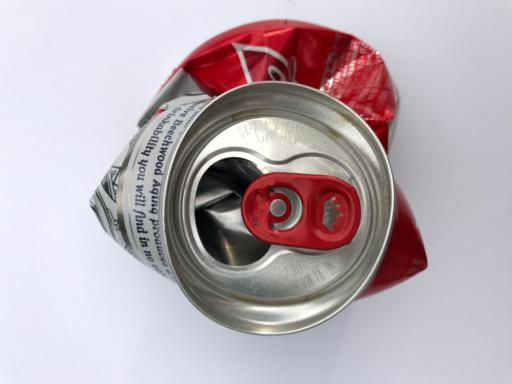

In [26]:
img

In [27]:
img=resize(img,(1,150,150,1))

In [28]:
y_new=model.predict(img)
ind=np.argmax(y_new)
print(ind)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1


In [41]:
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

79/79 ━━━━━━━━━━━━━━━━━━━━ 33s 424ms/step - accuracy: 0.6989 - loss: 1.7221
Accuracy: 79.63
